1 - Deterministic logistic growth

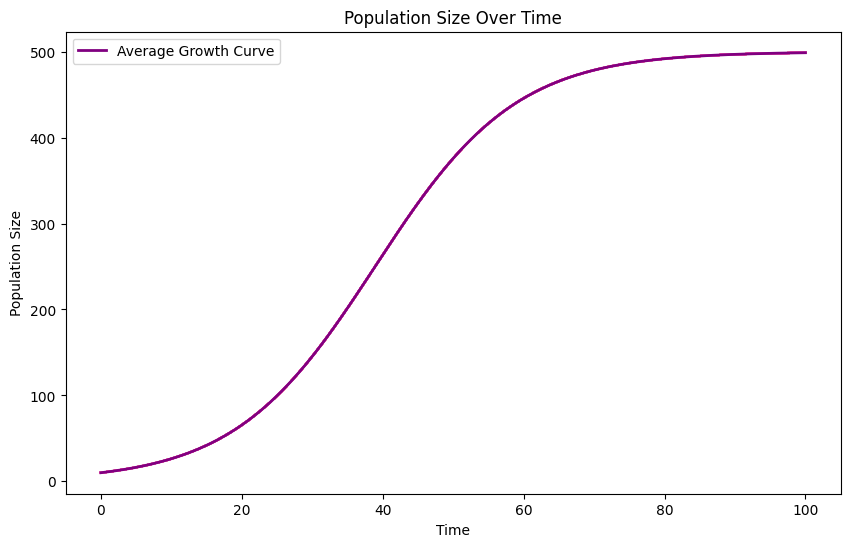

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def deterministic_logistic_growth(P0, r, K, t):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Parameters
P0 = 10  # Initial population size
r = 0.1  # Growth rate
K = 500  # Carrying capacity
t_max = 100  # Maximum time
t_points = np.linspace(0, t_max, 500)  # Time points

# Function to run multiple deterministic simulations
def run_multiple_simulations(P0, r, K, t_points, num_simulations=100):
    all_population_sizes = []
    
    for _ in range(num_simulations):
        P_t = deterministic_logistic_growth(P0, r, K, t_points)
        all_population_sizes.append(P_t)
    
    return all_population_sizes

# Run multiple simulations
num_simulations = 100
all_population_sizes = run_multiple_simulations(P0, r, K, t_points, num_simulations)

# Calculate the average population size at each time point
average_population_sizes = np.mean(all_population_sizes, axis=0)

# Plot the results with the average growth curve and quantile range
plt.figure(figsize=(10, 6))
for simulation in all_population_sizes:
    plt.plot(t_points, simulation, color='hotpink', alpha=0.2)

# Plot the average growth curve
plt.plot(t_points, average_population_sizes, color='purple', linestyle='-', linewidth=2, label='Average Growth Curve')

plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Population Size Over Time')
plt.legend()
plt.show()


2 - Deterministic exponential growth

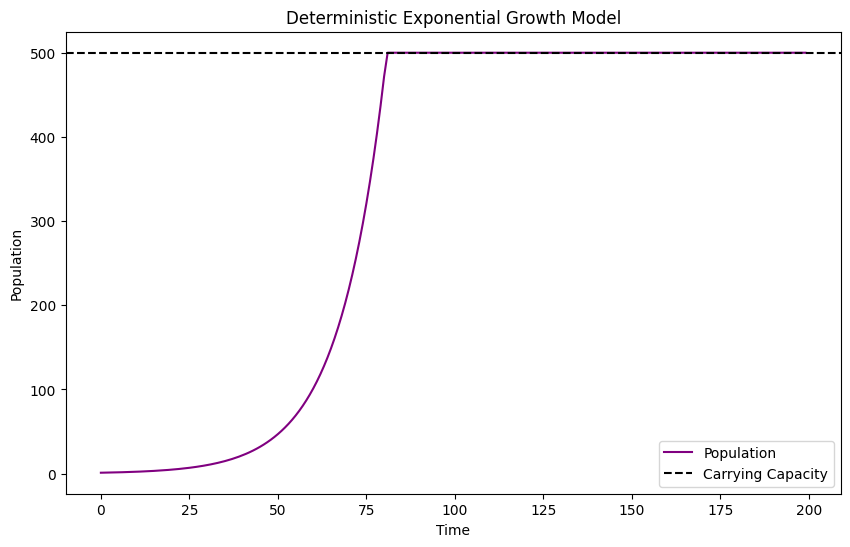

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def exp_growth_model(b, d, K, P0, time_steps, dt):
   
    r = b - d  #growth rate
    population = np.zeros(time_steps)
    population[0] = P0

    for t in range(1, time_steps):
        P = population[t-1]
        dP = r * P
        population[t] = P + dP
        if population[t] >= K:
            population[t:] = K
            break

    return population

def exp_growth_sol(b, d, K, P0, t):
    return K/(1+ (K-P0)/P0 * np.exp(-(b-d)*t))


def plot_population(population, K, time_steps):
   
    plt.figure(figsize=(10, 6))
    plt.plot(range(time_steps), population, color='purple', label='Population')
    plt.axhline(y=K, color='black', linestyle='--', label='Carrying Capacity')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Deterministic Exponential Growth Model')
    plt.legend()
    plt.show()

#Parameters
def model():
    b = 0.1  
    d = 0.02  
    K = 500  
    P0 = 1  
    time_steps = 200 
    dt = 1  

    population = exp_growth_model(b, d, K, P0, time_steps, dt)
    
    #Plot results
    plot_population(population, K, time_steps)

#Run main function
if __name__ == "__main__":
    model()


3 - Comparison of deterministic logistic growth vs deterministic exponential growth

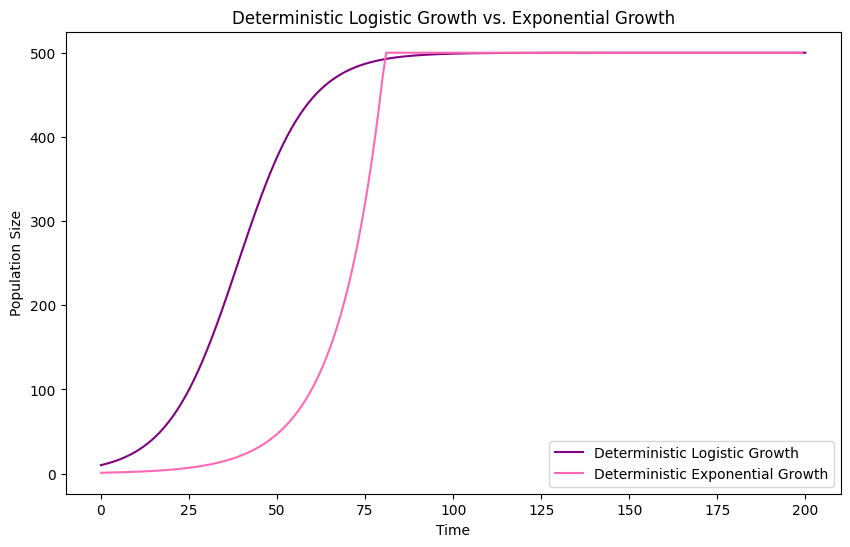

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the deterministic logistic growth function
def deterministic_logistic_growth(P0, r, K, t):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Define the deterministic exponential growth model
def exp_growth_model(b, d, K, P0, time_steps, dt):
    r = b - d  # Growth rate
    population = np.zeros(time_steps)
    population[0] = P0

    for t in range(1, time_steps):
        P = population[t-1]
        dP = r * P
        population[t] = P + dP
        if population[t] >= K:
            population[t:] = K
            break

    return population

# Parameters for logistic growth
P0_logistic = 10  # Initial population size
r_logistic = 0.1  # Growth rate
K_logistic = 500  # Carrying capacity
t_max_logistic = 200  # Maximum time
t_points_logistic = np.linspace(0, t_max_logistic, 500)  # Time points

# Parameters for exponential growth
b_exponential = 0.1
d_exponential = 0.02
K_exponential = 500
P0_exponential = 1
time_steps_exponential = 200
dt_exponential = 1

# Generate data for logistic growth
population_logistic = deterministic_logistic_growth(P0_logistic, r_logistic, K_logistic, t_points_logistic)

# Generate data for exponential growth
population_exponential = exp_growth_model(b_exponential, d_exponential, K_exponential, P0_exponential, time_steps_exponential, dt_exponential)
time_points_exponential = np.arange(time_steps_exponential) * dt_exponential

# Plot both models
plt.figure(figsize=(10, 6))
plt.plot(t_points_logistic, population_logistic, color='purple', label='Deterministic Logistic Growth')
plt.plot(time_points_exponential, population_exponential, color='hotpink', label='Deterministic Exponential Growth')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Deterministic Logistic Growth vs. Exponential Growth')
plt.legend()
plt.show()
